In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install numpy

In [4]:
import numpy as np

# Imported Dataset Below

In [5]:
salaries_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

# Start of Data Exploration: Summary Statistics of Dataset

In [6]:
salaries_df.describe()
#Observation: mean salary = 113706, median salary = 107300

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [7]:
salaries_df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


# Data Wrangling

In [8]:
salaries_df['Unnamed: 0'].is_unique

True

In [9]:
salaries_df = salaries_df.set_index('Unnamed: 0')

In [10]:
salaries_df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unnamed: 0,,,,,,
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


In [11]:
salaries_df = salaries_df.rename(columns={'Unnamed: 0': 'Identifier'})

In [12]:
salaries_df
# not sure why column didnt rename to Identifier. Code is correct.

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unnamed: 0,,,,,,
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
393,Prof,A,33,30,Male,103106
394,Prof,A,31,19,Male,150564
395,Prof,A,42,25,Male,101738


In [13]:
salaries_df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unnamed: 0,,,,,,
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
...,...,...,...,...,...,...
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [14]:
salaries_df.isnull().sum()
#checked that there are no missing values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Defined subset data by gender and summary statistics of subset data

In [15]:
salaries_male_df = salaries_df[salaries_df['sex']=='Male']

In [16]:
salaries_male_df.describe()
#Observation: mean salary = 115090 w/ yrs service = 18.27, median salary = 108043 w/ yrs service = 18.0

,yrs.since.phd,yrs.service,salary
count,358.000000,358.000000,358.000000
mean,22.946927,18.273743,115090.418994
std,13.036470,13.226234,30436.927344
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,92000.000000
50%,22.000000,18.000000,108043.000000
75%,33.000000,27.000000,134863.750000
max,56.000000,60.000000,231545.000000


In [17]:
salaries_female_df = salaries_df[salaries_df['sex']=='Female']

In [18]:
salaries_female_df.describe()
#Observation: mean salary = 101002 w/ yrs service = 11.56, median salary = 103750 w/ yrs service = 10. 
#In comparison to the salaries of male professors(including assistant and associate professors), female professors earn about
#4k-5k less than male professors. It is important to note that on average, the male professors years of service is 6+ years more
#than the female professors' average years of service. In conclusion, the difference in salary may be due to the years of 
#service.

,yrs.since.phd,yrs.service,salary
count,39.000000,39.000000,39.000000
mean,16.512821,11.564103,101002.410256
std,9.784176,8.813252,25952.127317
min,2.000000,0.000000,62884.000000
25%,10.000000,4.000000,77250.000000
50%,17.000000,10.000000,103750.000000
75%,23.500000,17.500000,117002.500000
max,39.000000,36.000000,161101.000000


# Defined subset data by rank and summary statistics of subset data

In [19]:
salaries_rank_prof_df = salaries_df[salaries_df['rank']=='Prof']

In [20]:
salaries_rank_prof_df.describe()
#Observation: mean salary = 126772 w/ yrs service = 22.81, median salary = 123321 w/ yrs service = 21.0

,yrs.since.phd,yrs.service,salary
count,266.000000,266.000000,266.000000
mean,28.300752,22.815789,126772.109023
std,10.108830,11.590493,27718.674999
min,11.000000,0.000000,57800.000000
25%,20.000000,15.000000,105975.250000
50%,28.000000,21.000000,123321.500000
75%,36.750000,30.000000,145080.500000
max,56.000000,60.000000,231545.000000


In [21]:
salaries_rank_assocprof_df = salaries_df[salaries_df['rank']=='AssocProf']

In [22]:
salaries_rank_assocprof_df.describe()
#Observation: mean salary = 93876 w/ yrs service = 11.95, median salary = 95626 w/ yrs service = 8.0

,yrs.since.phd,yrs.service,salary
count,64.000000,64.000000,64.000000
mean,15.453125,11.953125,93876.437500
std,9.652584,10.100180,13831.699844
min,6.000000,1.000000,62884.000000
25%,10.000000,7.000000,82475.000000
50%,12.000000,8.000000,95626.500000
75%,17.250000,11.000000,104226.250000
max,49.000000,53.000000,126431.000000


In [23]:
salaries_rank_asstprof_df = salaries_df[salaries_df['rank']=='AsstProf']

In [24]:
salaries_rank_asstprof_df.describe()
#Observation: mean salary = 80775 w/ yrs service = 2.37, median salary = 79800 w/ yrs service = 3.0

#from the above, we can conclude in general, prof salaries > assoc prof salaries > asst prof salaries

,yrs.since.phd,yrs.service,salary
count,67.000000,67.000000,67.000000
mean,5.104478,2.373134,80775.985075
std,2.541381,1.495811,8174.112637
min,1.000000,0.000000,63100.000000
25%,3.500000,1.000000,74000.000000
50%,4.000000,3.000000,79800.000000
75%,7.000000,3.000000,88597.500000
max,11.000000,6.000000,97032.000000


# Visualizations of salaries vs years of service by rank

In [25]:
#professor rank
salaries_prof_yrs_salary_df = salaries_rank_prof_df[['yrs.service','salary']]

In [26]:
salaries_prof_yrs_salary_df.sort_values('yrs.service',ascending=True)

,yrs.service,salary
Unnamed: 0,,
115,0,105000
206,2,96545
71,2,126320
41,2,146500
16,3,117150
...,...,...
351,49,186960
126,49,78162
283,51,57800


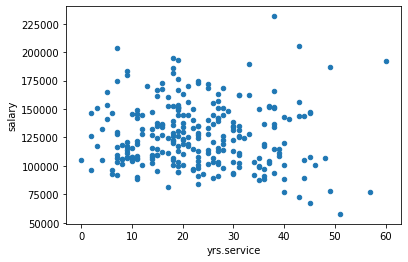

In [27]:
salaries_prof_yrs_salary_df.sort_values('yrs.service',ascending=True).plot(kind='scatter', x='yrs.service', y='salary')

In [28]:
#assistant professor rank
salaries_asstprof_yrs_salary_df = salaries_rank_asstprof_df[['yrs.service','salary']]

In [29]:
salaries_asstprof_yrs_salary_df.sort_values('yrs.service',ascending=True)

,yrs.service,salary
Unnamed: 0,,
155,0,92000
128,0,72500
309,0,74000
288,0,85000
36,0,77000
...,...,...
397,4,81035
91,5,97032
171,5,91227


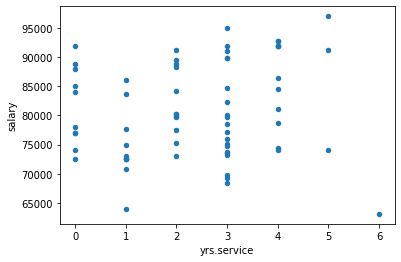

In [30]:
salaries_asstprof_yrs_salary_df.sort_values('yrs.service',ascending=True).plot(kind='scatter',x='yrs.service', y='salary')

In [31]:
#associate professor rank
salaries_assocprof_yrs_salary_df = salaries_rank_assocprof_df[['yrs.service','salary']]

In [32]:
salaries_assocprof_yrs_salary_df.sort_values('yrs.service',ascending=True)

,yrs.service,salary
Unnamed: 0,,
368,1,108413
294,1,104800
215,1,118700
383,5,86895
56,5,83900
...,...,...
189,28,106300
261,33,88600
300,39,70700


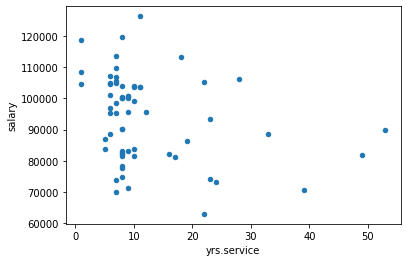

In [33]:
salaries_assocprof_yrs_salary_df.sort_values('yrs.service',ascending=True).plot(kind='scatter',x='yrs.service', y='salary')

# Visualizations of salaries vs years of service by gender

In [34]:
#female
salaries_female_yrs_salary_df = salaries_female_df[['yrs.service','salary']]

In [35]:
salaries_female_yrs_salary_df.sort_values('yrs.service',ascending=True)

,yrs.service,salary
Unnamed: 0,,
36,0,77000
128,0,72500
115,0,105000
134,1,72500
254,2,77500
35,2,80225
120,3,73500
53,3,74692
275,3,78500


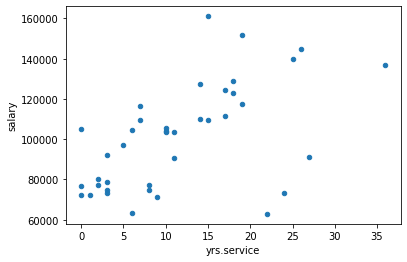

In [36]:
salaries_female_yrs_salary_df.sort_values('yrs.service',ascending=True).plot(kind='scatter',x='yrs.service', y='salary')

In [37]:
#male
salaries_male_yrs_salary_df = salaries_male_df[['yrs.service','salary']]

In [38]:
salaries_male_yrs_salary_df.sort_values('yrs.service',ascending=True)

,yrs.service,salary
Unnamed: 0,,
29,0,77000
165,0,88795
288,0,85000
155,0,92000
158,0,88000
...,...,...
126,49,78162
283,51,57800
195,53,90000


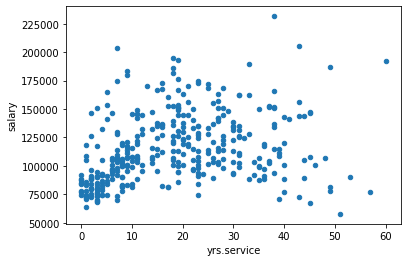

In [39]:
salaries_male_yrs_salary_df.sort_values('yrs.service',ascending=True).plot(kind='scatter',x='yrs.service', y='salary')